In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_telco_data.csv")
df.shape

(7032, 22)

## Which customers are risky for revenue if they leave?

### Check churn distribution

In [2]:
# Understand how many customers churned vs stayed
df['Churn'].value_counts().reset_index(name = 'total')

,Churn,total
0,No,5163
1,Yes,1869


In [3]:
# Churn percentage
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

### Monthly charges vs churn (revenue impact)

In [4]:
# Compare average monthly revenue between churned and retained customers

monthly_vs_churn = df.groupby('Churn')['MonthlyCharges'].mean().reset_index(name = 'avg_monthly_charges').round(1)
monthly_vs_churn

,Churn,avg_monthly_charges
0,No,61.3
1,Yes,74.4


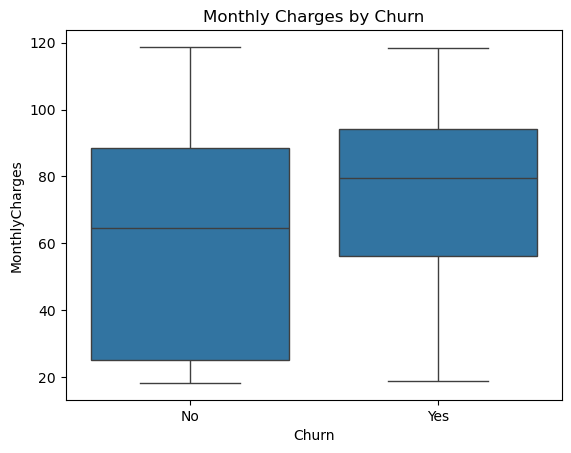

In [5]:
# Visualize monthly charges distribution by churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

### Tenure vs churn (early exit risk)

In [6]:
# Compare average tenure between churned and retained customers

tenure_vs_churn = df.groupby('Churn')['tenure'].mean().reset_index(name='avg_tenure').round(1)
tenure_vs_churn

,Churn,avg_tenure
0,No,37.7
1,Yes,18.0


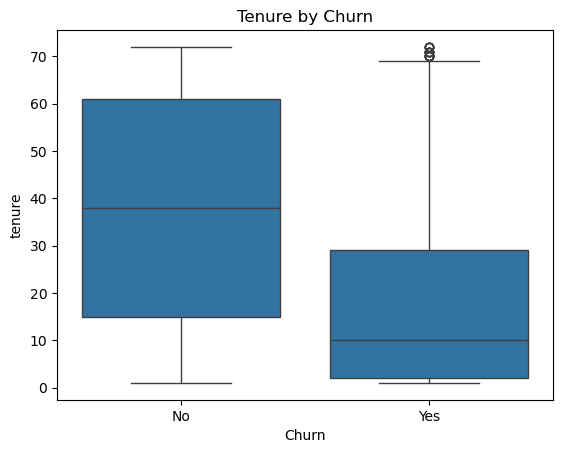

In [7]:
# Visualize tenure distribution by churn

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

### Total charges vs churn (lifetime value)

In [8]:
# Compare total revenue contribution

total_vs_churn = df.groupby('Churn')['TotalCharges'].mean().reset_index(name='avg_charges').round(1)
total_vs_churn

,Churn,avg_charges
0,No,2555.3
1,Yes,1531.8


### Combined financial risk view

In [9]:
# Combine key financial indicators

combined_risk = df.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].mean().round(1)
combined_risk

,MonthlyCharges,tenure,TotalCharges
Churn,,,
No,61.3,37.7,2555.3
Yes,74.4,18.0,1531.8


### Tenure group vs churn

In [10]:
# Identify which tenure groups churn the most

t_group_vs_churn = df.groupby(['Tenure_Group', 'Churn']).size().unstack()
t_group_vs_churn

Churn,No,Yes
Tenure_Group,,
0-12,1138,1037
13-24,730,294
25-48,1269,325
49-72,2026,213


### Insight:
Customers who churn tend to have higher monthly charges but significantly lower tenure.
This indicates that newly acquired, high-paying customers pose the highest immediate
financial risk to the company if they leave early.
